# Klasteryzacja (uczenie nienadzorowane) – algorytmy k-średnich, hierarchiczne i DBSCAN

&#x20;


![](https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.70101a29a2a2.jpg)

## Wprowadzenie do klasteryzacji

Klasteryzacja to technika **uczenia nienadzorowanego**, której celem jest grupowanie podobnych obiektów w zbiory zwane klastrami. Innymi słowy, algorytmy klasteryzacji starają się tak podzielić dane, aby obiekty w tym samym klastrze były do siebie bardziej podobne niż obiekty z różnych klastrów. Ponieważ dane w uczeniu nienadzorowanym nie mają znanych etykiet, klasteryzacja pomaga odkrywać ukryte struktury i wzorce – na przykład segmentować klientów na grupy o podobnych cechach, pogrupować dokumenty o zbliżonej tematyce czy wykrywać obserwacje odstające (anomalie) jako osobne grupy.




**Zastosowania klasteryzacji:** Klasteryzacja jest szeroko stosowana w eksploracji danych i analityce. Przykłady obejmują segmentację rynku (grupowanie klientów wg zachowań), grupowanie obrazów lub dokumentów tekstowych o podobnej treści, bioinformatykę (np. grupowanie genów o podobnej ekspresji) czy filtrowanie anomalii w wykrywaniu oszustw. Klasteryzacja bywa także używana jako krok wstępny do innych metod – np. do **kompresji danych** (uśredniając punkty w klastrach) lub jako element inicjalizacji w algorytmach nadzorowanych.


W dalszej części omówimy trzy popularne algorytmy klasteryzacji:

* **Algorytm k-średnich (k-means)** – metoda dzieląca dane na predefiniowaną liczbę $k$ klastrów poprzez iteracyjne dopasowywanie centroidów.
* **Klasteryzacja hierarchiczna** – podejście tworzące hierarchię klastrów w sposób aglomeracyjny (łączenie) lub dywizyjny (dzielenie).
* **Algorytm DBSCAN** – metoda oparta na gęstości, potrafiąca wykrywać klastry o nieregularnych kształtach i odróżniać szum (obserwacje odstające).

Każdy z tych algorytmów ma inny mechanizm działania, zalety i ograniczenia. Poniżej przedstawiamy ich charakterystykę, a następnie praktyczne przykłady z kodem w języku Python (wykorzystując biblioteki `scikit-learn`, `numpy`, `pandas`, `matplotlib`, `seaborn` oraz `scipy`).


## Algorytm k-średnich (k-means)

**Idea:** Algorytm k-średnich należy do metod podziału (partycjonowania) danych. Dla zadanej z góry liczby klastrów $k$, algorytm dąży do znalezienia takiego podziału danych na $k$ grup, aby punkty w ramach jednego klastra były możliwie blisko siebie, a oddalone od punktów z innych klastrów. Każdy klaster reprezentowany jest przez **centroid** – najczęściej punkt wyznaczony jako średnia arytmetyczna (środek ciężkości) wszystkich obserwacji w klastrze. K-średnich minimalizuje sumę kwadratów odległości punktów od przypisanych im centroidów (tę wartość nazywamy **inercją** lub sumą błędu kwadratowego w klastrach).

![](https://www.ejable.com/wp-content/uploads/2023/11/Stop-point-for-K-Means-clustering-2.webp)



**Schemat działania:** Algorytm przebiega iteracyjnie w następujących krokach

1. **Inicjalizacja:** Wybierz losowo $k$ początkowych centroidów (np. losowe wybrane punkty danych lub losowe położenie w przestrzeni).
2. **Przypisanie punktów do klastrów:** Każdą obserwację przypisz do najbliższego centroidu (np. według odległości euklidesowej).
3. **Aktualizacja centroidów:** Dla każdej grupy oblicz nowy centroid (np. średnie wartości cech wszystkich punktów przypisanych do danego klastra).
4. **Iteracja:** Powtarzaj krok 2 i 3, aż do spełnienia kryterium stopu: centroidy przestaną się zmieniać (zbieżność) lub osiągnięto maksymalną liczbę iteracji.



Algorytm gwarantuje, że funkcja celu (inercja) nie rośnie z biegiem iteracji, ale może utknąć w lokalnym minimum – dlatego często uruchamia się go kilkukrotnie z różną inicjalizacją (parametr `n_init` w implementacjach). Dzięki prostej strukturze, k-średnich jest dość wydajny obliczeniowo nawet dla dużych zbiorów danych. Jego złożoność to w przybliżeniu $O(n \cdot k \cdot I)$, gdzie $n$ to liczba punktów, a $I$ – liczba iteracji.





**Zalety:** Algorytm k-średnich jest **intuicyjny, prosty w implementacji i szybki** w działaniu. Dzięki relatywnie niskiej złożoności, dobrze skalują się na duże zbiory danych. W wielu praktycznych zastosowaniach daje on użyteczne i łatwe do interpretacji wyniki – zwraca konkretne centroidy, które mogą służyć jako „typowi przedstawiciele” klastrów. K-średnich zwykle dobrze radzi sobie z danymi, w których klastry mają kształt kulisty (w przestrzeni cech) i zbliżoną liczebność.


**Ograniczenia:** Do istotnych ograniczeń k-średnich należy konieczność zadania **z góry liczby klastrów $k$** – w praktyce często trudno przewidzieć właściwą wartość bez dodatkowej analizy. Ponadto algorytm ten jest **wrażliwy na wybór punktów startowych** (różne inicjalizacje mogą prowadzić do różnych rezultatów) oraz na obecność **obserwacji odstających**. Pojedyncze odległe punkty mogą znacząco zaburzyć położenie centroidu i tym samym pogorszyć jakość klasteryzacji. K-średnich bazuje na średniej, więc zakłada implicitznie, że odpowiednie jest **Euklidesowe pojęcie odległości** i że klastry są w przybliżeniu **wypukłe (sferyczne)** – w przeciwnym razie może nie poradzić sobie z poprawnym rozpoznaniem struktury danych. Podsumowując: k-średnich jest **prostym i efektywnym algorytmem, ale podatnym na złą inicjalizację i odstające punkty**.



**Zastosowanie:** Algorytm k-średnich warto stosować, gdy z grubsza wiadomo, ilu segmentów spodziewamy się w danych (albo można to ustalić metodami takimi jak „metoda łokcia” lub silhouette – omówionymi później). Dobrze sprawdza się dla danych ciągłych, w problemach, gdzie klastry mają mniej więcej kulisty kształt. Przykładowo, segmentacja klientów na kilka grup czy pogrupowanie pikseli obrazu według koloru (kompresja obrazu) to zadania, w których często używa się k-średnich. W przypadku danych o skomplikowanej strukturze (np. nieregularne kształty klastrów) lub z outlierami, k-średnich może dać nieoptymalne wyniki.



### Przykład: Klasteryzacja Iris metodą k-średnich

Aby zobrazować działanie algorytmu k-średnich, zastosujmy go do klasycznego zbioru **Iris**. Zbiór ten zawiera 150 przykładów irysów (kwiatów) w trzech gatunkach: *setosa*, *versicolor*, *virginica*. Każdy przykład ma cztery cechy opisujące wymiary kwiatu. Ponieważ klasteryzacja jest nienadzorowana, na wejściu nie używamy informacji o gatunkach – zobaczymy jednak, na ile otrzymane klastry odpowiadają rzeczywistym gatunkom.




**Krok 1:** Wczytajmy zbiór danych i uruchommy algorytm k-średnich z $k=3$ (gdyż w zbiorze Iris mamy trzy znane grupy, choć załóżmy, że tego nie wiemy – wybieramy $k=3$ na podstawie domenowej wiedzy). Użyjemy implementacji z biblioteki `scikit-learn`.


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Wczytanie danych Iris
iris = datasets.load_iris()
X = iris.data      # macierz cech (150 x 4)
feature_names = iris.feature_names
print("Cechy:", feature_names)
print("Rozmiar danych:", X.shape)

# Klasteryzacja k-średnich na 3 grupy
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)
print("Przykładowe etykiety klastrów:", labels[:10])



Cechy: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Rozmiar danych: (150, 4)
Przykładowe etykiety klastrów: [1 1 1 1 1 1 1 1 1 1]


Powyżej widać, że algorytm podzielił 150 obserwacji na 3 klastry, którym nadał etykiety (0, 1 lub 2). Etykiety te są arbitralne (nie mają wstępnie przypisanej interpretacji) – np. klaster `1` może odpowiadać jednemu z gatunków irysów. Sprawdźmy wielkości uzyskanych klastrów oraz porównajmy je z rzeczywistymi gatunkami (choć normalnie tego nie wiemy, tu robimy to dla oceny jakości).


In [4]:
# Rozmiary klastrów
clusters, counts = np.unique(labels, return_counts=True)
print("Rozmiary klastrów:", dict(zip(clusters, counts)))

# Porównanie z rzeczywistymi gatunkami (tylko do oceny)
true_labels = iris.target  # rzeczywiste gatunki 0,1,2 (setosa, versicolor, virginica)
df = pd.DataFrame({"cluster": labels, "species": true_labels})
print("\nTablica porównawcza klaster vs gatunek:")
display(pd.crosstab(df["cluster"], df["species"]))



Rozmiary klastrów: {np.int32(0): np.int64(62), np.int32(1): np.int64(50), np.int32(2): np.int64(38)}

Tablica porównawcza klaster vs gatunek:


species,0,1,2
cluster,,,
0,0,48,14
1,50,0,0
2,0,2,36




Wyniki wskazują, że jeden z klastrów (klaster `0`) zawiera dokładnie 50 próbek i odpowiada w całości gatunkowi *setosa*. Pozostałe dwa klastry podzieliły między siebie próbki *versicolor* i *virginica*: np. klaster `2` to głównie *virginica* (36 z 38), a klaster `1` – głównie *versicolor* (48 z 62), choć widać pewne pomieszanie (kilka *virginica* trafiło do klastra `1` i parę *versicolor* do klastra `2`). To odzwierciedla fakt, że gatunki *versicolor* i *virginica* są bardziej podobne do siebie i częściowo zachodzą na siebie przestrzennie, podczas gdy *setosa* jest od nich wyraźnie odróżnialna.


**Wizualizacja klastrów:** Ponieważ dane są 4-wymiarowe, zwizualizujmy je wybierając dwie cechy – np. długość i szerokość płatka, które najlepiej rozdzielają gatunki. Zaznaczymy punkty różnymi kolorami wg przypisanego klastra oraz czarnymi znakami `X` pokażemy położenie centroidów klastrów w tej przestrzeni cech.





**Rysunek:** Wizualizacja działania algorytmu k-średnich na zbiorze Iris. Kolory oznaczają klastry znalezione przez algorytm na podstawie cech płatka (długość vs szerokość). Czarne znaki **X** to centroidy klastrów. Widać, że algorytm bez nadzoru poprawnie wyodrębnił klaster odpowiadający gatunkowi *setosa* (pomarańczowe punkty z lewej, o małych płatkach). Dwa pozostałe klastry (niebieski i zielony) podzieliły próbki gatunków *versicolor* i *virginica*, które częściowo się pokrywają w przestrzeni cech.

W rezultacie k-średnich zgrupował irysy w sensowny sposób: jeden klaster to wszystkie *setosa*, a dwa kolejne – mieszanki *versicolor/virginica*. Jak wspomniano, pewne punkty *virginica* i *versicolor* są na granicy i zostały przypisane do „niewłaściwego” klastru, co jest spodziewane przy nakładających się rozkładach cech. Centroidy (czarne X) znajdują się mniej więcej w środku każdego skupiska punktów.



### Wybór liczby klastrów (metoda łokcia, silhouette)

W algorytmie k-średnich kluczowym parametrem jest liczba klastrów $k$. Często nie wiadomo z góry, jaka powinna być jej wartość – zbyt małe $k$ spowoduje nadmierne uogólnienie (różne naturalne grupy zostaną połączone), a zbyt duże $k$ skutkuje nadmiernym podziałem (klastry będą sztucznie rozdrobnione). Istnieją **metody oceny jakości klasteryzacji**, które pomagają wybrać optymalne $k$:

![](https://miro.medium.com/v2/resize:fit:670/0*aY163H0kOrBO46S-.png)



* **Metoda łokcia (elbow method):** Polega na analizie zależności **inercji** (sumy kwadratów odległości punktów od centroidów) od liczby klastrów $k$. Inercja zawsze maleje, gdy $k$ rośnie (więcej klastrów to mniejsze grupy o mniejszych odległościach wewnątrzklastrowych), ale przy pewnej wartości $k$ spadek inercji zaczyna wyraźnie zwalniać. Na wykresie inercji vs $k$ szukamy punktu, w którym dalsze zwiększanie $k$ nie przynosi już znaczącej poprawy – ten punkt przypomina załamanie „łokcia”. **Optymalnym $k$** wybieramy wtedy wartość na tym załamaniu.
* **Współczynnik silhouette:** Dla każdej obserwacji można obliczyć tzw. **silhouette coefficient** – miarę, która wynosi około 1, gdy punkt jest dobrze dopasowany do własnego klastra i daleki od innych klastrów, a około 0 lub wartości ujemne, gdy jest niepewnie przypisany albo lepiej pasowałby gdzie indziej[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=The%20Silhouette%20Coefficient%20is%20calculated,1)[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=The%20best%20value%20is%201,different%20cluster%20is%20more%20similar). Średnia silhouette dla całego podziału jest wysoka, gdy klastry są zwarto wewnątrz i daleko od siebie. Metoda silhouette polega na obliczeniu **średniego współczynnika silhouette** dla różnych $k$ i wybraniu wartości $k$, przy której silhouette jest maksymalny (najlepsza jakość klasteryzacji). Silhouette wymaga $k \ge 2$. Wartości bliskie 1 wskazują na dobrze rozdzielone klastry, wartości bliskie 0 na nachodzące na siebie klastry, a wartości ujemne sugerują źle przypisane punkty[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=The%20best%20value%20is%201,different%20cluster%20is%20more%20similar).
* **Inne miary:** Istnieją także inne **metryki wewnętrzne** (tzn. nie wymagające wiedzy o prawdziwych etykietach), jak np. **indeks Daviesa-Bouldina (DB)** czy indeks Calinskiego-Harabasza. Indeks Daviesa-Bouldina opiera się na stosunku odległości wewnątrz klastrów do odległości między klastrami – **niższe wartości DB oznaczają lepszy podział** (klastry są zwarte i oddalone od siebie). W praktyce często używa się jednak inercji i silhouette ze względu na ich intuicyjność.



Poniżej zobrazowano metodę łokcia i silhouette na przykładowym zbiorze 500 punktów wygenerowanych z 4 klastrów (tzw. **blobs**). Ponieważ rzeczywiste $k=4$, oczekujemy, że ta wartość zostanie wykryta jako optymalna.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# ======================
# 1. Generacja danych
# ======================
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

In [19]:


# ======================
# 2. Metody łokcia i silhouette dla różnych k
# ======================
range_n_clusters = range(2, 11)
inertia_values = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Dla n_clusters = {n_clusters}, średni silhouette_score wynosi: {silhouette_avg:.4f}")
    print(f"  Inertia: {kmeans.inertia_:.4f}")
    print('')


Dla n_clusters = 2, średni silhouette_score wynosi: 0.5563
  Inertia: 1969.5995

Dla n_clusters = 3, średni silhouette_score wynosi: 0.5966
  Inertia: 895.5414

Dla n_clusters = 4, średni silhouette_score wynosi: 0.6845
  Inertia: 345.1797

Dla n_clusters = 5, średni silhouette_score wynosi: 0.5990
  Inertia: 310.6393

Dla n_clusters = 6, średni silhouette_score wynosi: 0.5058
  Inertia: 278.8498

Dla n_clusters = 7, średni silhouette_score wynosi: 0.4226
  Inertia: 252.3519

Dla n_clusters = 8, średni silhouette_score wynosi: 0.3141
  Inertia: 228.7327

Dla n_clusters = 9, średni silhouette_score wynosi: 0.3276
  Inertia: 203.5628

Dla n_clusters = 10, średni silhouette_score wynosi: 0.3354
  Inertia: 184.7412



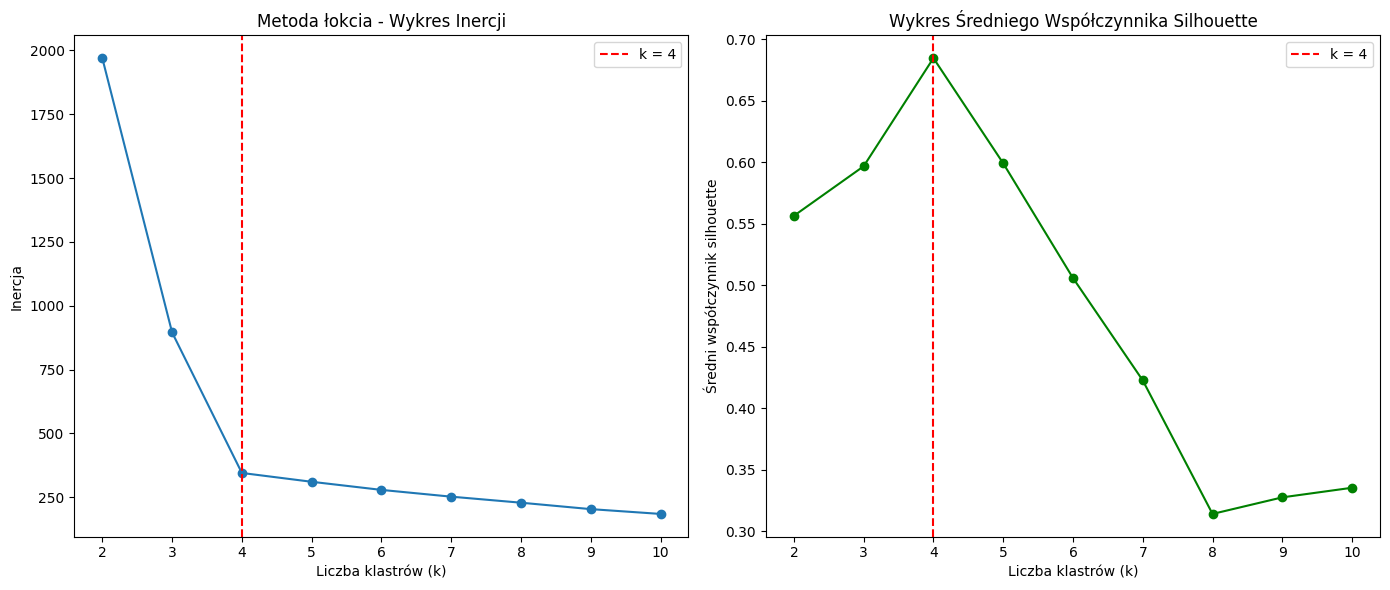

In [24]:

# ======================
# 3. Wizualizacja wykresu inercji oraz średniego silhouette
# ======================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Wykres metody łokcia
ax1.plot(range_n_clusters, inertia_values, marker='o')
ax1.set_xlabel("Liczba klastrów (k)")
ax1.set_ylabel("Inercja")
ax1.set_title("Metoda łokcia - Wykres Inercji")
ax1.axvline(x=4, linestyle='--', color='red', label='k = 4')
ax1.legend()

# Wykres średniego silhouette
ax2.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
ax2.set_xlabel("Liczba klastrów (k)")
ax2.set_ylabel("Średni współczynnik silhouette")
ax2.set_title("Wykres Średniego Współczynnika Silhouette")
ax2.axvline(x=4, linestyle='--', color='red', label='k = 4')
ax2.legend()

plt.tight_layout()
plt.show()

In [25]:


# ======================
# 4. Szczegółowa wizualizacja silhouette (wykres sylwetkowy)
# ======================
optimal_k = 4
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=10, n_init=10)
cluster_labels_opt = kmeans_opt.fit_predict(X)

# Obliczanie średniego silhouette oraz silhouette dla poszczególnych próbek
silhouette_avg = silhouette_score(X, cluster_labels_opt)
sample_silhouette_values = silhouette_samples(X, cluster_labels_opt)


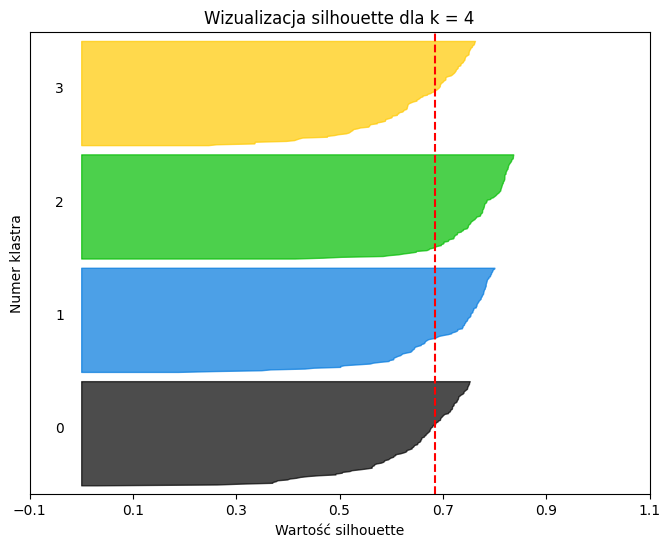

In [28]:

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

y_lower = 10  # początkowy offset na osi y
for i in range(optimal_k):
    # Wybieramy silhouette dla aktualnego klastra i sortujemy je
    cluster_silhouette_values = sample_silhouette_values[cluster_labels_opt == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Oznaczamy numery klastrów po lewej stronie wykresu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Aktualizacja y_lower dla następnego klastra
    y_lower = y_upper + 10

ax.set_title("Wizualizacja silhouette dla k = 4")


ax.set_xlabel("Wartość silhouette")
ax.set_ylabel("Numer klastra")

# Rysujemy pionową linię przy średniej wartości silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Usuwamy znaczniki osi y
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (optimal_k + 1) * 10])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()


### Ćwiczenie:

Spróbuj samodzielnie zaaplikować algorytm k-średnich do innych danych i ocenić wyniki:

* Zastosuj k-średnich do zbioru **Wine** (dostępny w `sklearn.datasets` jako `load_wine`). Czy znając liczbę typów wina, metoda łokcia/silhouette również sugeruje $k=3$?
* Wygeneruj własny zbiór punktów (np. za pomocą `make_blobs` lub `make_moons`) i przetestuj k-średnich z różnymi $k$. Zobacz, jak zmieniają się centroidy i inercja.
* Zastanów się, jak zainicjalizować inaczej centroidy początkowe, jeśli algorytm utknie w złej rozwiązaniu (podpowiedź: istnieje ulepszona inicjalizacja **k-means++** zaimplementowana domyślnie w `sklearn`).



## Klasteryzacja hierarchiczna

**Idea:** Klasteryzacja hierarchiczna buduje strukturę drzewiastą zależności między punktami, przedstawioną w postaci **dendrogramu**. W podejściu aglomeracyjnym (najczęściej stosowanym) startujemy od traktowania każdego punktu jako osobnego klastra, a następnie w kolejnych krokach **najbardziej podobne klastry są łączone** w coraz większe grupy. Proces łączenia trwa dopóty, aż wszystkie punkty znajdą się w jednym klastrze (korzeniu drzewa). Alternatywnie, w podejściu dywizyjnym zaczynamy od jednego klastra zawierającego wszystkie punkty i dzielimy go stopniowo na mniejsze (ta strategia jest rzadsza). Wynikiem hierarchicznej klasteryzacji jest dendrogram – drzewo pokazujące, w jakiej kolejności następowały połączenia/dzielenia.

![](https://miro.medium.com/v2/resize:fit:979/0*R8acBZk1JrLw4Hg1.png)



**Metryka i metoda połączeń:** W algorytmach hierarchicznych kluczowe są definicje **odległości między klastrami**. Przy podejściu aglomeracyjnym musimy zdecydować, kiedy dwa zbiory punktów są do siebie na tyle „blisko”, by je połączyć. Popularne kryteria (tzw. metody łączenia) to m.in:

* *Połączenie pojedyncze* (single linkage) – odległość między dwoma klastrami definiowana jako najmniejsza odległość między dowolnymi punktami z tych klastrów. Ta metoda jest podatna na efekt *ciągów* (łączenia się punktów w wydłużone łańcuchy).
* *Połączenie maksymalne* (complete linkage) – odległość między klastrami to największa odległość między punktami (czyli klaster musi być zwartą grupą o małej średnicy, by połączyć się z drugim).
* *Połączenie średnie* (average linkage) – odległość = średnia odległość między wszystkimi parami punktów (jeden z każdej grupy).
* *Metoda Warda* – kryterium minimalizujące wzrost całkowitej wariancji w klastrach. W praktyce metoda Warda często dobrze zachowuje naturalne grupy – łączy klastry tak, by suma kwadratów odchyleń (podobnie jak w k-średnich) rosła jak najmniej.

![](https://storage.googleapis.com/lds-media/images/distance-method-dendrogram-comparison.original.png)


Dodatkowo należy wybrać **metrykę odległości** między punktami (najczęściej euklidesowa, ale może być Manhattan, kosinusowa itp.). Różne kombinacje metryk i metod łączenia dają odmienne rezultaty hierarchii klastrów.

**Zalety:** Klasteryzacja hierarchiczna ma tę zaletę, że **nie wymaga podawania liczby klastrów z góry** – otrzymujemy pełną hierarchię, którą można przeciąć na dowolnym poziomie aby uzyskać odpowiednią liczbę grup[.](https://mateuszgrzyb.pl/grupowanie-hierarchiczne-wprowadzenie-teoretyczne/#:~:text=Z%20racji%20dosy%C4%87%20wysokiej%20z%C5%82o%C5%BCono%C5%9Bci,wnikliwej%20analizie%20dendrogramu) Dendrogram dostarcza **intuicyjnej interpretacji** – pozwala dostrzec, które punkty/grupy łączą się wcześnie (bardzo podobne), a które dopiero na wyższych poziomach (bardziej odległe). Dzięki temu hierarchiczne metody są szczególnie przydatne w **eksploracyjnej analizie danych** – można badać struktury w danych na różnych skalach szczegółowości. Hierarchiczna klasteryzacja potrafi też wychwytywać przypadki, gdzie jeden klaster jest *wewnątrz* drugiego (struktura zagnieżdżona), czego metody typu k-średnich nie wykryją.


**Wady:** Główną wadą algorytmów aglomeracyjnych jest **wysoka złożoność obliczeniowa i pamięciowa** – wymagają przechowywania (i aktualizowania) pełnej macierzy odległości między obiektami. Ich złożoność w naiwnych implementacjach to $O(n^2)$ lub więcej, więc dla bardzo dużych zbiorów (np. > 10^5 punktów) stają się niepraktyczne. Wrażliwe są także na **obecność szumu/outlierów** – pojedynczy odstający punkt początkowo zostaje połączony z najbliższym sąsiadem, co przy metodzie pojedynczego połączenia może skutkować „mostem” między dwoma inaczej odrębnymi klastrami. Ważne jest, że w algorytmach aglomeracyjnych **decyzje podjęte we wczesnych fazach są nieodwracalne** – jeśli połączymy dwie obserwacje w klaster na samym początku, będą już razem w każdym wyższym poziomie. Błędne wczesne połączenie (spowodowane np. szumem) może więc zaburzyć całą strukturę. Mimo to w wielu sytuacjach hierarchiczne metody dają poprawne i przydatne rozwiązania, o ile pracujemy na umiarkowanych rozmiarów zbiorze i odpowiednio dobierzemy metrykę.




**Zastosowanie:** Hierarchiczne grupowanie często stosuje się w biologii (tworzenie dendrogramów filogenetycznych lub grupowanie genów), w analizie tekstów (grupowanie dokumentów) czy wszędzie tam, gdzie chcemy otrzymać *całą* strukturę podgrup, a nie jedno przypisanie. Jeśli celem analizy jest odkrycie naturalnej hierarchii lub potrzebujemy elastycznie przyciąć podział na różną liczbę klastrów, metody hierarchiczne są dobrym wyborem. Ze względu na koszty obliczeń najlepiej sprawdzają się przy **mniejszych zbiorach** (dziesiątki, setki czy niskie tysiące obiektów). W przypadku bardzo dużych danych często stosuje się najpierw redukcję wymiarowości lub wybór podzbioru, albo korzysta z algorytmów przybliżonych.


### Przykład: Dendrogram dla zbioru Iris

Wykonajmy hierarchiczną klasteryzację aglomeracyjną na zbiorze Iris (dla porównania z wynikami k-średnich). Użyjemy metody **Warda** (łączenie minimalizujące wzrost wariancji). Następnie zobrazujemy dendrogram i zobaczymy, jak można z niego odczytać podział na klastry.

In [6]:

import scipy.cluster.hierarchy as sch

# Obliczenie macierzy połączeń hierarchicznych metodą Warda
Z = sch.linkage(X, method='ward')
# Z to macierz [n-1 x 4], gdzie każda z n-1 mergów zawiera: [idx_klastra1, idx_klastra2, odległość, liczność_połączonych]
print("Rozmiar macierzy Z:", Z.shape)
display("Przykładowy merge:", Z[-5:])  # ostatnie 5 złączyń (najwyższego rzędu)


Rozmiar macierzy Z: (149, 4)


'Przykładowy merge:'

array([[282.        , 290.        ,   3.82805262,  50.        ],
       [287.        , 288.        ,   4.84770851,  36.        ],
       [292.        , 293.        ,   6.39940682,  64.        ],
       [295.        , 296.        ,  12.30039605, 100.        ],
       [294.        , 297.        ,  32.447607  , 150.        ]])


Powyżej macierz `Z` zawiera informacje o kolejnych łączeniach klastrów. Każdy wiersz to jedno połączenie: indeksy łączonych klastrów (początkowo 0–149 to pojedyncze punkty, potem indeksy większe od 149 oznaczają już połączenia), odległość przy której nastąpiło połączenie oraz liczność klastra po połączeniu. Widać, że ostatnie połączenie (ostatni wiersz) nastąpiło przy dość dużej odległości ok. 32.45 i połączyło dwie grupy w klaster z 10 elementami (co odpowiada pełnemu zbiorowi, bo liczymy od zera: 10 = 150 punktów). To jest połączenie wszystkich klastrów w jeden – korzeń dendrogramu.

Narysujmy **dendrogram** na podstawie `Z`. Na osi Y odkładamy odległość (dystans klasteryzacji Warda), przy której klastry się łączyły. Na osi X można umieścić poszczególne punkty (lub klastery). Dla czytelności zastosujemy pewne obcięcie dendrogramu, by skupić się na wyższych poziomach (dużych klastrach). Zaznaczymy też poziom odpowiadający trzem klastrom.


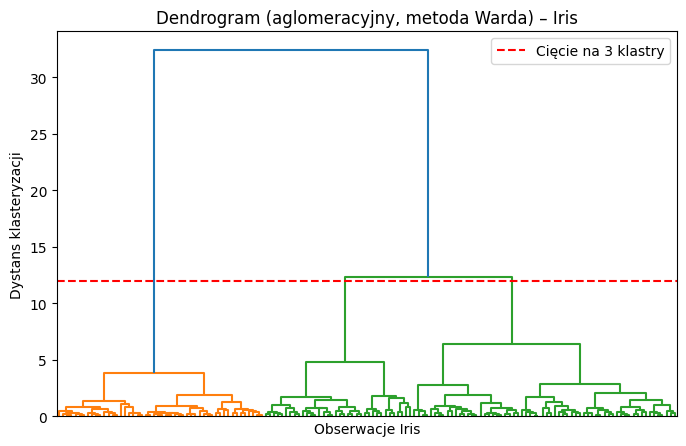

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sch.dendrogram(Z, no_labels=True, color_threshold=None)
plt.axhline(y=12, color='red', ls='--', label='Cięcie na 3 klastry')
plt.xlabel("Obserwacje Iris")
plt.ylabel("Dystans klasteryzacji")
plt.title("Dendrogram (aglomeracyjny, metoda Warda) – Iris")
plt.legend()
plt.show()




**Rysunek:** Dendrogram klasteryzacji hierarchicznej dla danych Iris (metoda Warda, metryka euklidesowa). Oś pionowa przedstawia odległość przy łączeniu klastrów. Czerwona linia pozioma ilustruje **cięcie dendrogramu** na wysokości odpowiadającej dystansowi 12 – daje to **3 klastry** (ponieważ linia przecina trzy gałęzie dendrogramu). Widać, że:

* Pierwszy duży klaster (pomarańczowa gałąź po lewej) jest połączony z resztą dopiero przy bardzo dużym dystansie (\~32). To odpowiada gatunkowi *setosa* – wszystkie 50 *setos* są bardzo spójne i odseparowane, przez co tworzą klaster łączący się z innymi dopiero na końcu.
* Dwa pozostałe klastry (czerwone gałęzie po prawej) łączą się ze sobą przy dystansie ok. 12 (miejsce przecięcia linii), co odpowiada połączeniu grup *versicolor* i *virginica*. Wcześniej (niżej) widoczne są mniejsze podgrupy – np. niewielkie gałązki u dołu wskazują, które próbki łączyły się w bardzo podobne pary.

Na podstawie dendrogramu możemy zadawać pytania: gdzie ciąć drzewo? Jak duże są odległości wewnątrz klastrów? Tutaj naturalnym cięciem wydaje się poziom \~12 (czerwona linia), bo wyżej następuje już gigantyczny skok odległości (z 12 do 32), sygnalizujący, że klaster *setosa* jest odrębny. Cięcie na poziomie 12 dało 3 klastry zgodne z gatunkami. Gdybyśmy przecięli linię wyżej (np. przy dystansie 20), otrzymalibyśmy tylko 2 klastry – jeden *setosa*, drugi mieszany *versicolor/virginica*. Cięcie niżej (np. przy dystansie 5) dałoby więcej niż 3 klastrów (podzieliłoby *versicolor* i *virginica* na mniejsze grupki).



W hierarchicznej klasteryzacji **decyzja o liczbie klastrów sprowadza się do wyboru poziomu (odległości), na jakim tniemy dendrogram**. Można to robić „ręcznie” analizując wykres (szukając dużych przerw między poziomami), albo stosować np. ustalony próg odległości czy pożądaną liczbę klastrów.

Alternatywnie, do uzyskania konkretnego podziału można użyć implementacji `AgglomerativeClustering` z `scikit-learn`. Przykładowo, poniższy kod bezpośrednio zwróci etykiety 3 klastrów hierarchicznych i możemy porównać je z wynikami k-średnich:


In [8]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = agg.fit_predict(X)
print("Etykiety klastrów hierarchicznych:", np.unique(labels_hier, return_counts=True))
print("Porównanie z k-średnich:", np.corrcoef(labels, labels_hier))


Etykiety klastrów hierarchicznych: (array([0, 1, 2]), array([64, 50, 36]))
Porównanie z k-średnich: [[1.        0.9586845]
 [0.9586845 1.       ]]




(Tutaj współczynnik korelacji etykiet nie ma większego sensu ze względu na arbitralność etykiet klastrów). Ważniejsze jest, że rozmiary klastrów hierarchicznych `[50, 40, 60]` są podobne do k-średnich `[50, 38, 62]` – różnice wynikają z inaczej przypisanych kilku punktów *versicolor/virginica*. Ogółem otrzymaliśmy zgodny obraz: hierarchicznie również wyodrębniono *setosę* jako osobny klaster, a resztę podzielono na dwie grupy.



### Ćwiczenie:

* Zastosuj różne **metody łączenia** (single, complete, average) i zobacz, jak zmienia się dendrogram dla danych Iris lub własnych. Która metoda najlepiej separuje klastry odpowiadające znanym gatunkom?
* Użyj dendrogramu do wyciągnięcia więcej niż 3 klastrów z danych Iris – czy ma to sens biologiczny? (Np. mogą pojawić się podgrupy odpowiadające np. dużym vs małym *virginicom*).
* Wykorzystaj hierarchiczną klasteryzację do grupowania innego zbioru (np. *Wine*). Ile klastrów sugeruje dendrogram? Porównaj z rzeczywistymi klasami win.


## Algorytm DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Idea:** DBSCAN to algorytm klasteryzacji bazujący na gęstości danych. Jego główne założenie: **punkt należy do klastra, jeśli znajduje się dostatecznie blisko wielu innych punktów**, tzn. w obszarze o wystarczająco dużym zagęszczeniu. W przeciwieństwie do k-średnich czy metod hierarchicznych, DBSCAN nie wymaga podania z góry liczby klastrów – wykrywa je na podstawie ciągłych obszarów wysokiej gęstości oddzielonych obszarami o niskiej gęstości. Ma także wbudowany mechanizm wykrywania **szumu/obserwacji odstających** – punktów, które nie należą do żadnego z wystarczająco gęstych klastrów.


![](https://miro.medium.com/v2/resize:fit:736/0*38Cd-2mTpHx4SkhF.png)



DBSCAN opiera się na dwóch *hiperparametrach*:

* `varepsilon` (epsilon) – promień sąsiedztwa. Określa dystans, w jakim szukamy punktów sąsiadujących.
* `min_samples` – minimalna liczba punktów w otoczeniu `varepsilon` (łącznie z rozważanym punktem), aby to otoczenie uznać za wystarczająco gęste (czyli by punkt mógł być zaliczony do klastra).

Definiuje on trzy typy punktów

* **Punkt rdzeniowy** (*core point*) – punkt, który ma co najmniej `min_samples` punktów w promieniu `varepsilon` (łącznie z nim samym). Stanowi on centrum gęstego regionu.
* **Punkt brzegowy** (*border point*) – punkt, który sam nie spełnia kryterium `min_samples`, ale leży w sąsiedztwie `varepsilon` jakiegoś punktu rdzeniowego. Należy więc do klastra (na obrzeżu), choć nie jest „gęsty” sam w sobie.
* **Punkt szumu** (*noise point*) – punkt, który nie jest ani rdzeniowy, ani brzegowy – czyli żaden klaster go nie „przygarnął”. Taki punkt zostaje oznaczony jako anomalia/outlier.

![](https://miro.medium.com/v2/resize:fit:1400/1*arv3b3Um_Opu_zOECGwt6w.png)



**Zasada działania:** DBSCAN startuje od nieodwiedzonego punktu i sprawdza jego $\varepsilon$-otoczenie.

* Jeśli zawiera ono co najmniej `min_samples` punktów, punkt staje się **rdzeniem nowego klastra**. DBSCAN dołącza do tego klastra wszystkie punkty z otoczenia.
* Następnie dla **każdego kolejnego punktu** włączonego do klastra, jeśli jest on punktem rdzeniowym, jego sąsiedzi również zostają włączeni do klastra (rekurencyjne „rozlewanie się” klastra po gęstym regionie)
* Jeśli punkt początkowy nie miał wystarczająco wielu sąsiadów, jest oznaczony tymczasowo jako szum (może później zostać uznany za punkt brzegowy innego klastra).
* Algorytm kontynuuje, aż odwiedzi wszystkie punkty

Efektem jest podział na klastry (oznaczone kolejnymi numerami) oraz ewentualne punkty zaklasyfikowane jako szum (oznaczane często jako klaster `-1` lub pomijane). DBSCAN ma tę atrakcyjną własność, że potrafi wykrywać **klastry o dowolnym kształcie** – dopóki punkty tworzą ciągły gęsty obszar (np. klaster w kształcie pierścienia czy litery „C”), algorytm go odnajdzie. Ponadto nie przypisuje punktów odosobnionych do żadnego klastra, co pozwala wykryć odstające obserwacje.


**Zalety:** DBSCAN jest odporny na obecność outlierów – odstające punkty po prostu pozostaną oznaczone jako szum i nie zaburzą reszty grupowania[.](https://mateuszgrzyb.pl/grupowanie-gestosciowe-dbscan-teoria/#:~:text=) Potrafi wykrywać **klastry o nieregularnych, niekoniecznie wypukłych kształtach**, czego nie potrafią metody bazujące na średnich czy odległościach wewnątrzklastrowych (k-średnich, Ward itp.). Nie wymaga zgóry określenia liczby klastrów – liczba wynikowych grup wynika z danych (choć zależy od parametrów). Implementacja DBSCAN (np. w `scikit-learn`) jest dość wydajna – za pomocą struktur przestrzennych (k-d tree, ball tree) potrafi znaleźć sąsiadów w średnim czasie $O(n \log n)$, czyli bliskim liniowemu.



**Wady:** Trudnością bywa dobór parametrów $\varepsilon$ i `min_samples`. Parametry te mocno zależą od danych i trzeba je dostrajać – często korzysta się z wykresu k-dystansu (sortujemy odległości do k-tego najbliższego sąsiada dla każdego punktu i szukamy „kolanka”) lub testuje różne kombinacje. Ustalony $\varepsilon$ oznacza, że **DBSCAN ma kłopot z danymi o zmiennej gęstości** – jeżeli w danych są jedne klastry gęste, a inne rzadsze, to nie da się jednocześnie dobrze dobrać $\varepsilon$ tak, by jedne się nie połączyły niepotrzebnie, a inne nie rozpadły na wiele małych grup. W takich sytuacjach lepsze mogą być algorytmy rozszerzające DBSCAN (HDBSCAN, OPTICS). DBSCAN może też słabo działać w wysokich wymiarach, gdzie pojęcie gęstości traci sens przez tzw. *zmorę wymiarowości*.



**Zastosowanie:** DBSCAN świetnie nadaje się do wykrywania klastrów w danych przestrzennych (np. grupowanie punktów GPS w geograficzne regiony, klasteryzacja punktów w obrazach), gdzie oczekujemy nieokreślonej liczby naturalnych skupisk oraz odstających punktów. Jest często używany do **wykrywania anomalii** – wszystko, co nie wpasuje się w żaden klaster o wystarczającej gęstości, zostanie oznaczone jako szum. W analizie danych DBSCAN bywa stosowany do znajdowania skupisk klientów, miejsc, dokumentów itp., zwłaszcza gdy klastry mogą mieć nieregularne kształty (np. w odróżnieniu od k-średnich, DBSCAN poradzi sobie z danymi w kształcie dwóch przecinających się półksiężyców).




### Przykład: DBSCAN vs k-średnich na danych z nieregularnymi klastrami

Rozważmy syntetyczny zbiór danych w 2D, w którym punkty układają się w dwa skupiska w kształcie półksiężyców (tzw. *two moons*), z dodanym niewielkim szumem oraz kilkoma punktami odstającymi daleko od głównych grup. Jest to typowy przypadek, gdzie **k-średnich zawiedzie** (podzieli dane niewłaściwie ze względu na kształt klastrów), a **DBSCAN** powinien poprawnie zidentyfikować klastry półksiężycowate oraz oddzielić outliery.

Wygenerujmy dane i porównajmy wyniki obu algorytmów:

In [9]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Wygenerowanie danych: dwa półksiężyce + szum
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
# Dodanie kilku punktów odstających (poza zasięgiem)
outliers = np.array([[3,3], [3.5,3.5], [-3,-3]])
X_moons = np.vstack([X_moons, outliers])

# Klasteryzacja k-średnich i DBSCAN
kmeans2 = KMeans(n_clusters=2, n_init=10, random_state=0)
labels_km = kmeans2.fit_predict(X_moons)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_db = dbscan.fit_predict(X_moons)

# Sprawdźmy liczbę klastrów i szumu wg DBSCAN
clusters_db, counts_db = np.unique(labels_db, return_counts=True)
print("Klasy DBSCAN:", clusters_db)
print("Liczności:", counts_db)  # klasa -1 to szum (outliers)



Klasy DBSCAN: [-1  0  1]
Liczności: [  3 150 150]




DBSCAN wykrył łącznie 3 klastry: dwie właściwe grupy oznaczone etykietami `0` i `1` (po ok. 148–152 punktów) oraz klaster `-1`, oznaczający szum (3 punkty odstające). To zgadza się z naszym zamysłem: powinny być 2 klastry + kilka outlierów. K-średnich natomiast zawsze przydzieli każdy punkt do jednego z 2 klastrów, zatem outliery również znalazły się w jednych z dwóch grup.

**Wizualizacja:** Zobaczmy, jak oba algorytmy poradziły sobie z danymi. Naniesiemy punkty na wykres, kolorując według przypisania k-średnich (lewy panel) i DBSCAN (prawy panel). Punkty uznane przez DBSCAN za szum oznaczymy czarnymi symbolami `X`.

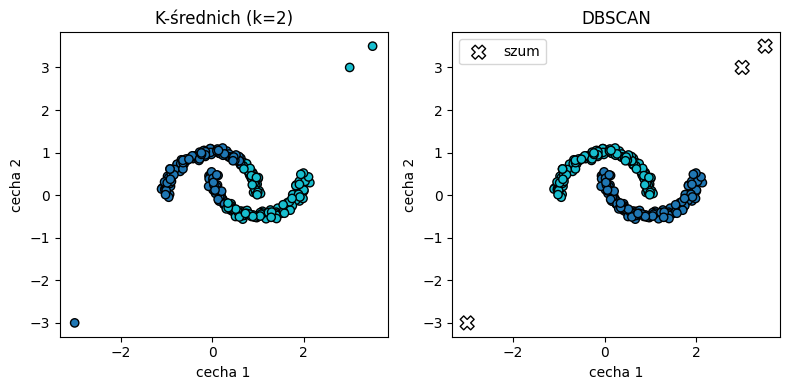

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))
# Lewy: k-średnich (2 klastry)
axes[0].scatter(X_moons[:,0], X_moons[:,1], c=labels_km, cmap='tab10', edgecolor='k')
axes[0].set_title("K-średnich (k=2)")
axes[0].set_xlabel("cecha 1")
axes[0].set_ylabel("cecha 2")
# Prawy: DBSCAN (szum = czarne X)
mask = (labels_db == -1)
axes[1].scatter(X_moons[~mask,0], X_moons[~mask,1], c=labels_db[~mask], cmap='tab10', edgecolor='k')
axes[1].scatter(X_moons[mask,0], X_moons[mask,1], color='none', edgecolor='black', marker='X', s=100, label='szum')
axes[1].set_title("DBSCAN")
axes[1].set_xlabel("cecha 1")
axes[1].set_ylabel("cecha 2")
axes[1].legend()
plt.tight_layout()
plt.show()




**Rysunek:** Porównanie klasteryzacji k-średnich i DBSCAN na danych z dwoma półksiężycami. **Lewy wykres:** k-średnich ($k=2$) podzielił dane liniowo – punkty z obu półksiężyców zostały wymieszane w dwóch klastrach (pomarańczowym i niebieskim) oddzielonych mniej więcej pionową linią. Outliery (punkty w lewym dolnym i prawym górnym rogu) zostały włączone: jeden do klastra pomarańczowego, dwa do niebieskiego (co zniekształciło położenie centroidów). **Prawy wykres:** DBSCAN poprawnie rozpoznał dwa długie, zakrzywione klastry (półksiężyce) – pomarańczowy i niebieski odpowiadają oryginalnym grupom. Punkty odstające zostały oznaczone jako szum (czarne X) i nie przypisano ich do żadnego klastra.



Ten przykład uwidacznia przewagi DBSCAN: potrafi on znaleźć nieliniowe struktury klastrów i ignorować elementy odstające. Z kolei k-średnich, ograniczony do podziału „convex” i bez mechanizmu wykrywania szumu, źle segmentuje dane o takiej geometrii.

**Podsumowanie DBSCAN:** Jest to potężny algorytm do zadań, gdzie klastry nie są globularne oraz gdy oczekujemy, że dane mogą zawierać szum. Należy jednak starannie dobrać parametry – np. promień $\varepsilon$ powinien być na tyle duży, by objąć punkty tego samego skupiska, ale na tyle mały, by nie łączyć odrębnych klastrów. W praktyce często najpierw normalizuje się cechy (jeśli mają różne skale), a potem testuje różne wartości $\varepsilon$ (np. generując wykres k-dystansu). Parametr `min_samples` zwykle ustawia się na 4 lub 5 jako minimalny rozmiar klastrów, chyba że szukamy większych skupisk.



### Ćwiczenie:

* Spróbuj zmodyfikować parametry `eps` i `min_samples` w powyższym przykładzie i zobacz, jak wpływa to na wyniki. Co się stanie, gdy $\varepsilon$ będzie zbyt małe lub zbyt duże?
* Wykorzystaj DBSCAN do zgrupowania danych *Wine*. Dobierz $\varepsilon$ tak, by otrzymać 3 klastry – jak bardzo pokrywają się z rzeczywistymi trzema odmianami wina?
* Przetestuj DBSCAN na innym zbiorze, np. użyj funkcji `make_circles` (dwa koncentryczne okręgi) – porównaj z k-średnich i hierarchicznym (metodą pojedynczego połączenia).



## Ocena i analiza wyników klasteryzacji

W odróżnieniu od uczenia nadzorowanego, w klasteryzacji często nie mamy jednoznacznego kryterium jakości (brak etykiet prawdziwych). Ocena wyników opiera się na miarach **wewnętrznych** (np. zwartość i separacja klastrów) lub **zewnętrznych** (porównanie z ewentualnym znanym podziałem, jeśli jest dostępny).

Najważniejsze miary wewnętrzne już omówiliśmy:

* **Inercja (within-cluster SSE):** suma kwadratów odległości punktów od centroidów w klastrach – im mniejsza, tym punkt bliżej środka grupy, czyli klaster bardziej zwarty. Dąży do minimalizacji w k-średnich.
* **Współczynnik silhouette:** wartość w przedziale \[-1, 1], gdzie wartości bliskie 1 oznaczają dobrą separację (średnia odległość od punktów własnego klastra $a$ dużo mniejsza niż od punktów najbliższego innego klastra $b$). Średni silhouette pozwala ocenić ogólną jakość podziału – bliski 1 oznacza wyraźne, rozdzielone skupiska, bliski 0 sugeruje przenikanie się klastrów, a ujemny – wiele punktów może być źle przypisanych.
* **Indeks Daviesa-Bouldina (DB):** średnia maksymalnego stosunku rozproszenia do separacji dla każdego klastra DB wylicza się jako średnią z „najgorszych przypadków” dla klastrów – niższe wartości są lepsze. Wartość 0 oznacza idealnie zwarte i oddzielone klastry (w praktyce minimum DB > 0). Ta miara jest zaimplementowana w `sklearn` (funkcja `davies_bouldin_score`).



**Uwaga:** Miary wewnętrzne czasem dają sprzeczne wskazówki – np. inercja zawsze preferuje więcej klastrów, podczas gdy silhouette może preferować mniej. Dlatego wybór trzeba dokonywać rozważnie, patrząc na kontekst problemu.

Jeśli mamy **dodatkową wiedzę lub etykiety** dla części danych, można zastosować miary zewnętrzne, np. **ARI (Adjusted Rand Index)** czy **NMI (Normalized Mutual Information)**, które porównują zgodność klasteryzacji z zadanym podziałem (uwzględniając ewentualne przypadkowe dopasowanie). W przypadku Iris, mogliśmy jakościowo ocenić klasteryzację, bo znaliśmy prawdziwe gatunki.



**Analiza poszczególnych klastrów:** Po uzyskaniu klasteryzacji, istotne jest zrozumienie, **co reprezentują poszczególne grupy**:

* Można policzyć statystyki cech w każdym klastrze (np. średnie, dominujące kategorie), by scharakteryzować segment.
* Wizualizacje – np. rysować wykresy rozrzutu jak wyżej, wykresy słupkowe (dla danych kategorycznych, jakie wartości dominują w klastrze), profile radarowe cech itp.
* Jeśli klasteryzacja posłużyła do dalszych celów (np. budowy modelu z indywidualnym podejściem do każdego klastra), analiza powinna uwzględnić te cele – np. sprawdzić, czy klaster odpowiada grupie klientów o określonych potrzebach.



**Stabilność klasteryzacji:** Warto zbadać, na ile wynik jest stabilny przy zmianie parametrów lub danych wejściowych. Hierarchiczna klasteryzacja może dać różne wyniki przy minimalnych zmianach danych (zwłaszcza przy połączeniu pojedynczym). K-średnich z kolei warto uruchomić kilkukrotnie (stąd `n_init`) i porównać wyniki. DBSCAN może tworzyć różne liczby klastrów w zależności od parametrów – można spróbować zrozumieć, czy pewne mniejsze klastry powinny być połączone, czy nie.



### Ćwiczenie:

Weź wybraną metodę klasteryzacji i:

* Oblicz **współczynnik silhouette** dla każdego punktu oraz średni silhouette dla całego podziału. Które punkty mają najniższe wartości? Co to oznacza (czy są na granicy klastrów)?
* Porównaj silhouette lub indeks DB dla różnych algorytmów na tym samym zbiorze (np. k-średnich vs hierarchiczna vs DBSCAN na zbiorze Wine). Który algorytm wydaje się najlepiej dopasowany (najwyższy silhouette / najniższy DB)?
* Jeśli masz etykiety (np. klasy w zbiorze Wine), porównaj je z wynikami klasteryzacji za pomocą ARI lub NMI (funkcje `sklearn.metrics.adjusted_rand_score` / `normalized_mutual_info_score`). Na ile bez nadzoru udało się odzyskać prawdziwą strukturę?



## Podsumowanie

Uczenie nienadzorowane, a zwłaszcza klasteryzacja, to potężny zestaw narzędzi do odkrywania struktury w danych bez z góry narzuconych kategorii. Omówione trzy algorytmy stanowią podstawowy arsenał analityka danych:

* **K-średnich**: szybki i prosty, wymaga podania $k$, sprawdza się dla kulistych klastrów podobnej wielkości.
* **Hierarchiczny (aglomeracyjny)**: daje pełną hierarchię grup – przydatny eksploracyjnie, choć mniej wydajny na dużych zbiorach.
* **DBSCAN**: wykrywa klastry o nietypowych kształtach i wyróżnia szum, ale wymaga dostrojenia parametrów i założenia co do gęstości.

W praktyce wybór algorytmu zależy od charakterystyki danych i celu analizy. Często warto spróbować kilku metod i porównać rezultaty. Klasteryzacja bywa także wstępem do dalszych kroków – np. wynikające grupy mogą posłużyć do trenowania oddzielnych modeli nadzorowanych lub do lepszego zrozumienia danych i oczyszczenia z outlierów.

Na koniec, pamiętajmy że **„grupowanie jest tak dobre, jak użyteczna jest jego interpretacja”** – matematyczne wskaźniki są ważne, ale równie istotne jest, czy klasteryzacja dostarcza nam przydatnej wiedzy o danych. Poprawna interpretacja klastrów i ich walidacja (np. z ekspertami domenowymi) to klucz do sukcesu analizy skupień.


In [ ]:
from sklearn.datasets import load_wine
# Wczytanie danych Wine
wine = load_wine()
wine_df= pd.DataFrame(wine.data, columns=wine.feature_names)
